# Our Measures vs Plate Reader AIGUA PESC 2.6d12 
* This exercise should help us decide which 'pocillos' to consider, and which to discard.
* We use data from *Aigua Pesc* and *Exp Gal*

In [1]:
import cv2 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imageproc import get_pocillos, complete_the_grid, draw_circles, array_from_pic, circle_crop

## Absorbancia

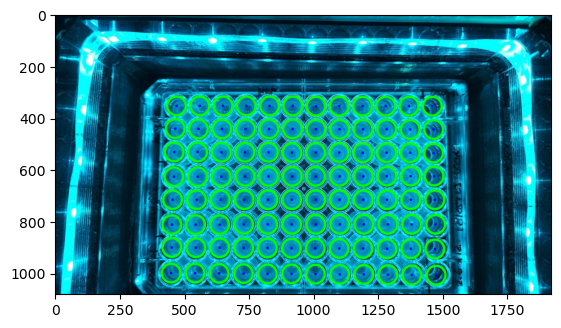

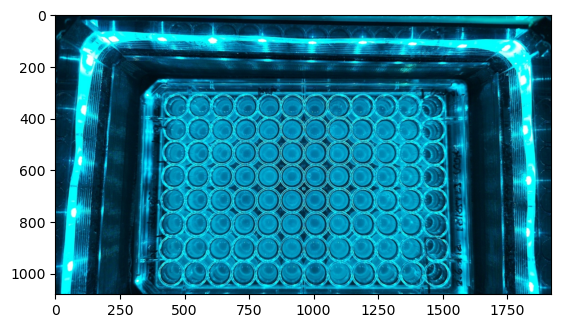

In [2]:
img_path = '/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-05-12_10:19:57 AIGUA PESC 2.6d12/PLATE1/Picture_Aigua_10M5_#1_2023-05-12_10:22:40_P1_Cam2.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
circles = get_pocillos(img_bw)
new_circles = complete_the_grid(circles)
draw_circles(img, new_circles)

plt.imshow(img)

### Our measure

In [3]:
grid_positions = new_circles[:,3:5]
mean_output_array = np.zeros((8,12))
for i, position in enumerate(grid_positions):
        cropped_pocillo = circle_crop(img, new_circles[i,0:3])
        cropped_pocillo_blue = cropped_pocillo[:,:,2]
        mean_output_array[position[0], position[1]] = np.mean(cropped_pocillo_blue[cropped_pocillo_blue != 0])

### Plate reader

In [4]:
readings = pd.read_excel('/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-05-12_10:19:57 AIGUA PESC 2.6d12/Copy of 2.xlsx').iloc[3:11,2:14].values.astype(float)
pd.DataFrame(readings)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.8092,0.5783,0.4709,0.5001,1.0705,0.8303,0.5323,0.8444,0.5945,0.4904,0.6011,0.1018
1,0.8335,0.4075,0.5054,0.5510,0.9548,0.7802,0.4895,0.9226,0.5697,0.6007,0.5649,0.1393
2,0.8787,0.4258,0.5396,0.5144,0.9216,0.8617,0.5640,0.9217,0.6269,0.6033,0.6622,0.1138
3,0.9166,0.4624,0.4736,0.5331,0.9841,0.7537,0.5545,0.9216,0.5710,0.5722,0.6666,0.1285
4,0.8920,0.4733,0.5012,0.3750,0.7634,0.8858,0.5212,0.9284,0.5428,0.6184,0.6211,0.1200
5,0.8510,0.4976,0.4796,0.5028,0.9519,0.7986,0.5317,0.9162,0.4712,0.5879,0.5388,0.1454
6,0.8618,0.5374,0.5026,0.4686,0.8632,0.8864,0.4855,0.9275,0.5344,0.5873,0.5746,0.1324
7,0.8284,0.4111,0.4816,0.4478,0.8284,0.8152,0.4061,0.8828,0.4128,0.4920,0.5169,0.0706


### Comparing
* Orange = our measure
* Blue = reading

Row  1


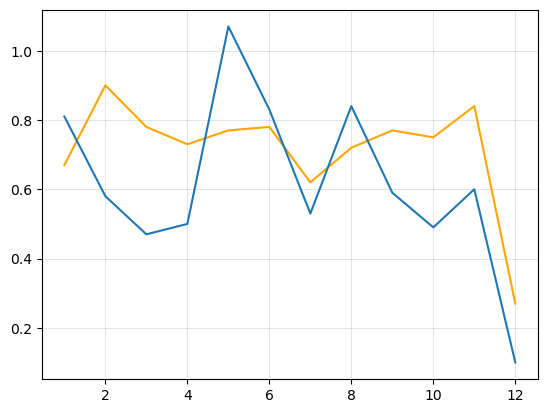

Row  2


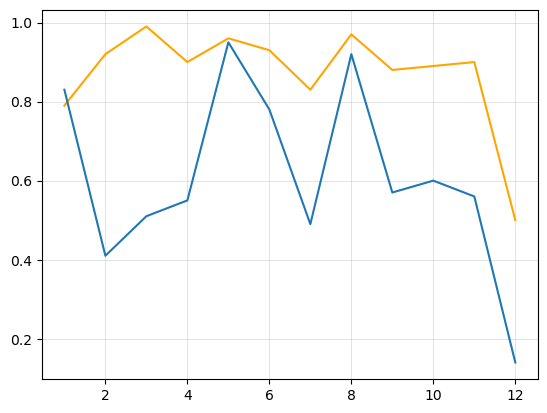

Row  3


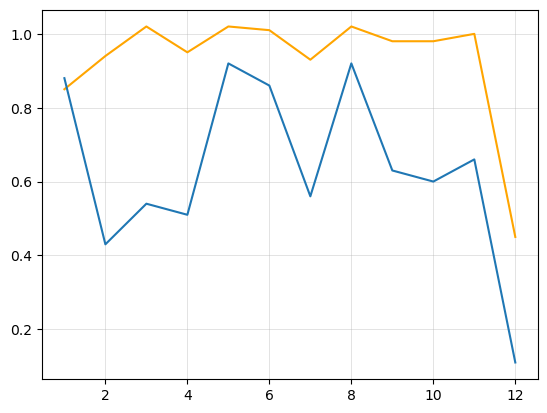

Row  4


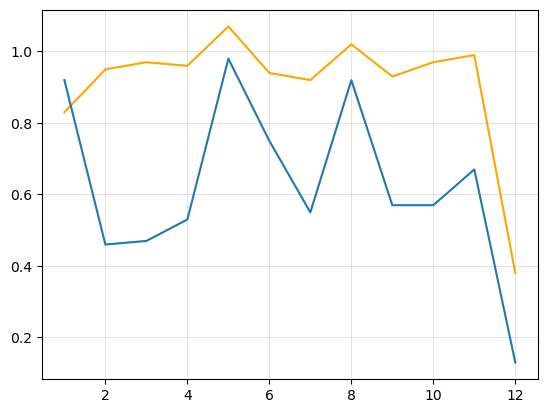

Row  5


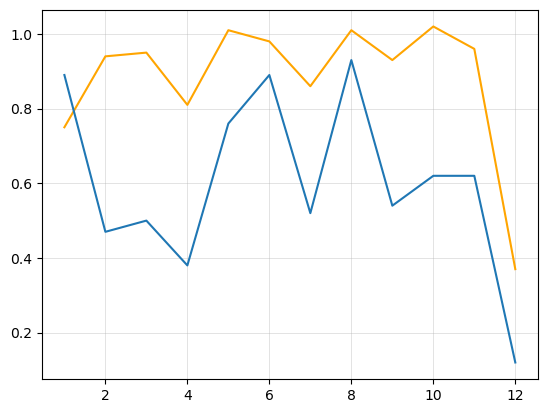

Row  6


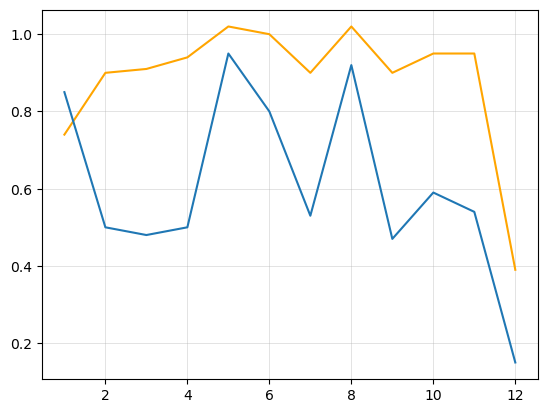

Row  7


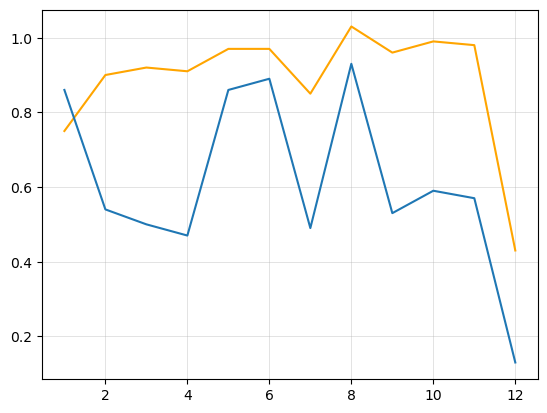

Row  8


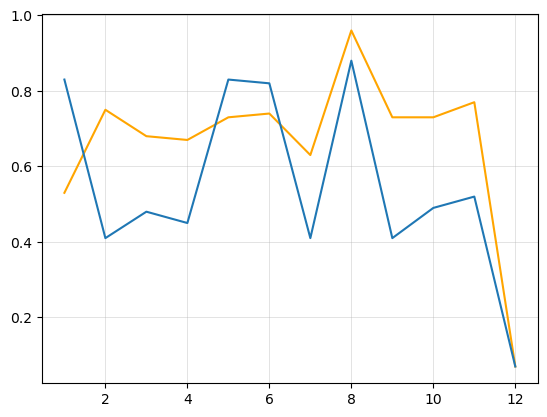

In [5]:
# Linear scaling to fit max/min range of the readings
x = mean_output_array
a, b = readings.min(), readings.max()
x_norm = (x - x.min()) * (b - a) / (x.max() - x.min()) + a
x_norm = np.round(x_norm, 2)
readings = np.round(readings,2)

# Plot results row by row
for i in range(8):   
    print("Row ", i+1)
    plt.plot(np.arange(1,13), x_norm[i,:], "orange")
    plt.plot(np.arange(1,13), readings[i,:])
    plt.grid(linewidth=0.5, alpha=0.5)
    plt.show()

In [6]:
np.mean(readings-x_norm), np.mean(readings-x_norm)/np.mean(readings)

(-0.23604166666666668, -0.38841275282824816)

#### Little experiment 1: Remove first and last columns

In [7]:
readings1 = np.round(readings,2)[:, 1:11]

In [8]:
# Linear scaling to fit max/min range of the readings
x = mean_output_array[:, 1:-1]
a, b = readings1.min(), readings1.max()
x_norm = (x - x.min()) * (b - a) / (x.max() - x.min()) + a
x_norm = np.round(x_norm, 2)

Row  1


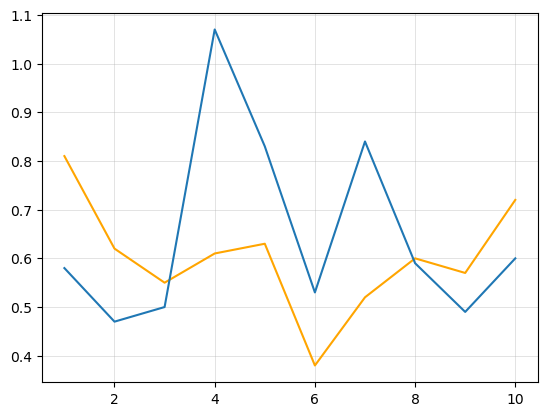

Row  2


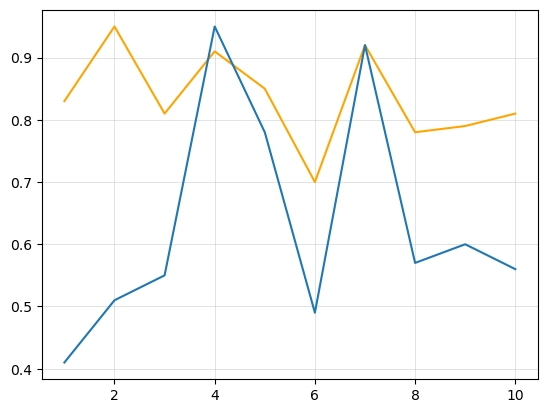

Row  3


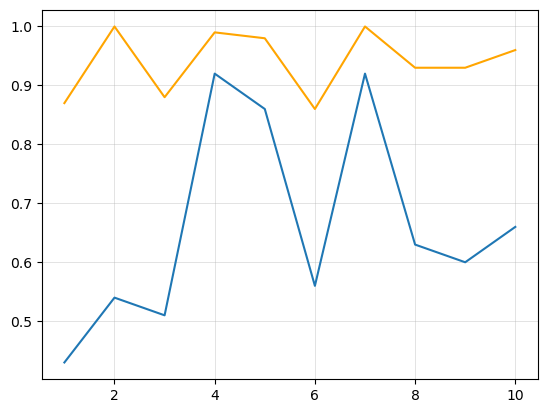

Row  4


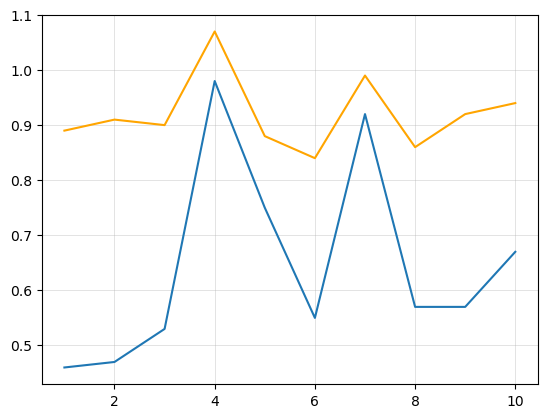

Row  5


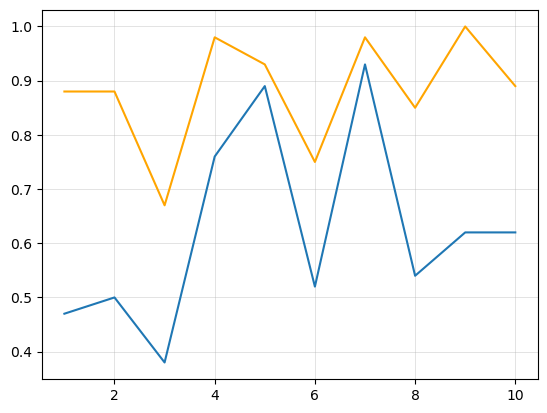

Row  6


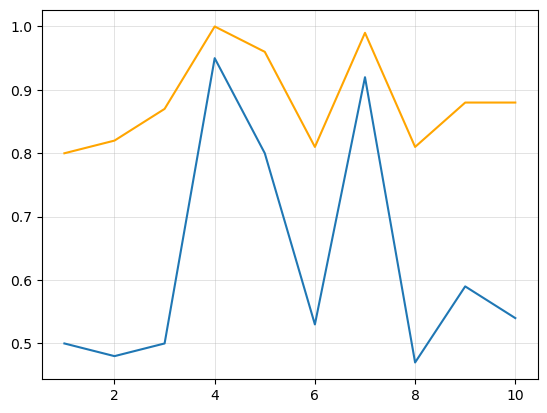

Row  7


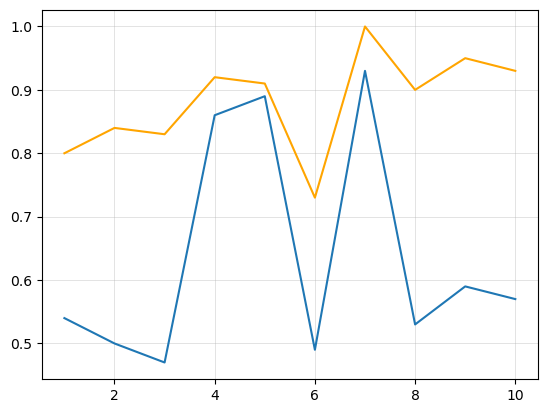

Row  8


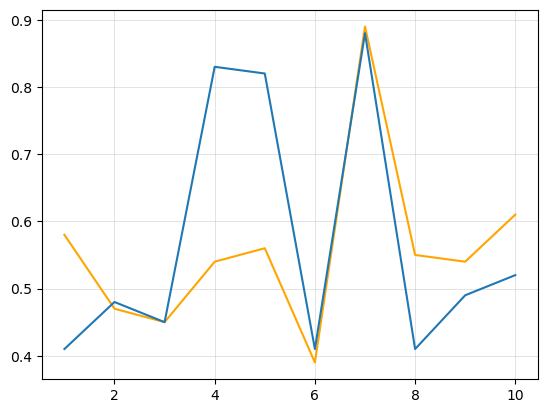

In [9]:
for i in range(8):   
    print("Row ", i+1)
    plt.plot(np.arange(1,11), x_norm[i,:], "orange")
    plt.plot(np.arange(1,11), readings1[i,:])
    plt.grid(linewidth=0.5, alpha=0.5)
    plt.show()

In [10]:
np.mean(readings1-x_norm),  np.mean(readings1-x_norm)/np.mean(readings1)

(-0.18075000000000002, -0.2862232779097388)

#### Little experiment 2: Remove first and last columns & rows

In [11]:
readings2 = np.round(readings,2)[1:7, 1:11]
x = mean_output_array[1:7, 1:-1]
a, b = readings2.min(), readings2.max()
x_norm = (x - x.min()) * (b - a) / (x.max() - x.min()) + a
x_norm = np.round(x_norm, 2)

Row  2


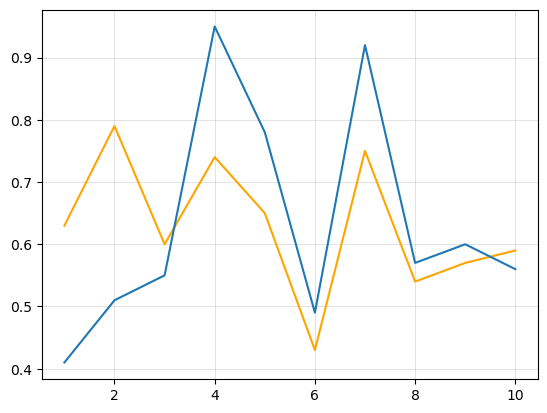

Row  3


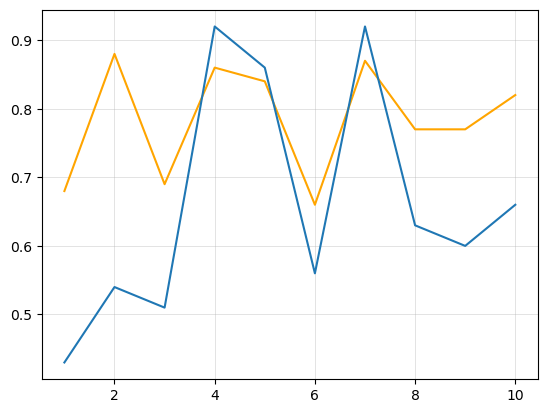

Row  4


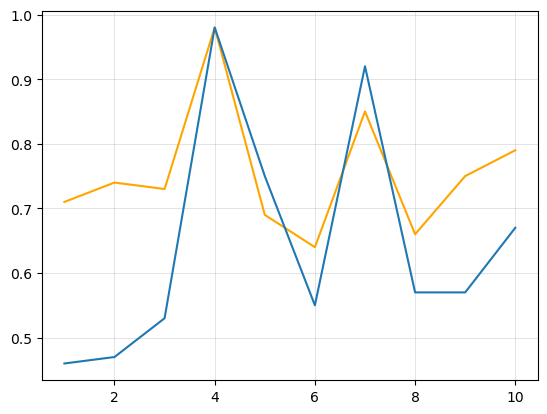

Row  5


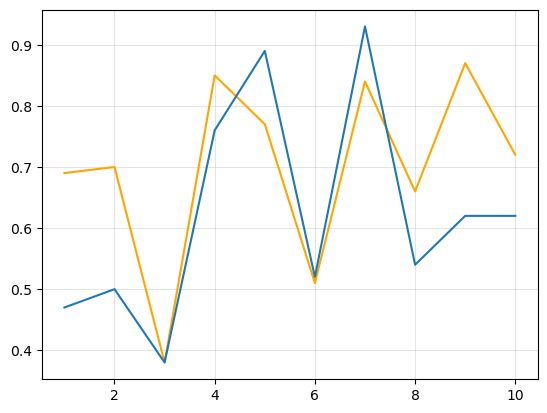

Row  6


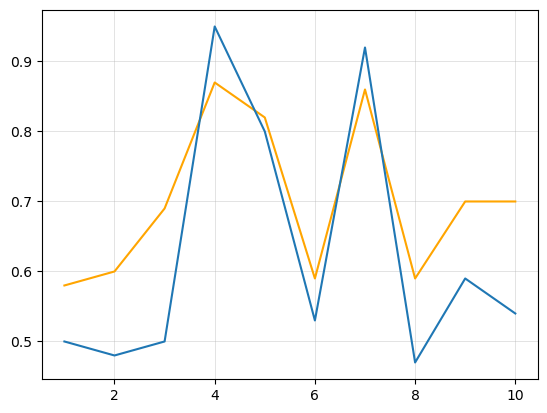

Row  7


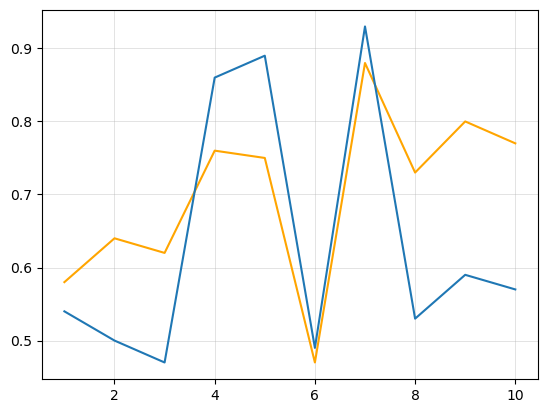

In [12]:
for i in range(6):   
    print("Row ", i+2)
    plt.plot(np.arange(1,11), x_norm[i,:], "orange")
    plt.plot(np.arange(1,11), readings2[i,:])
    plt.grid(linewidth=0.5, alpha=0.5)
    plt.show()

In [13]:
np.mean(readings2-x_norm), np.mean(readings2-x_norm)/np.mean(readings2)

(-0.07233333333333333, -0.11325678496868476)

### Fluorescència

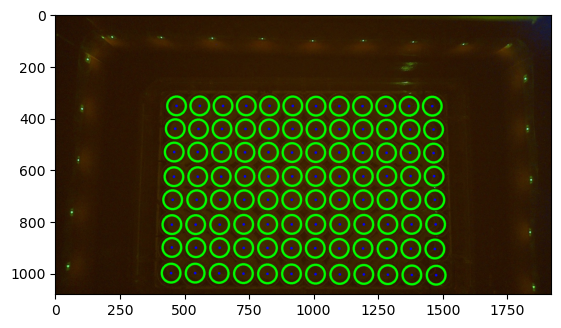

In [14]:
img_path = '/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-05-12_10:19:57 AIGUA PESC 2.6d12/PLATE1/Picture_Aigua_10M5_#1_2023-05-12_10:22:40_P1_Cam1.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
draw_circles(img, new_circles)

In [15]:
grid_positions = new_circles[:,3:5]
q9_output_array = np.zeros((8,12))

for i, position in enumerate(grid_positions):
        cropped_pocillo = circle_crop(img, new_circles[i,0:3])
        cropped_pocillo_green = cropped_pocillo[:,:,1]
        q9_output_array[position[0], position[1]] = np.percentile(cropped_pocillo_green[cropped_pocillo_green != 0], 90).astype(int)        
        
readings = pd.read_excel('/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-05-12_10:19:57 AIGUA PESC 2.6d12/Copy of 2.xlsx').iloc[24:32,2:14].values.astype(int)
pd.DataFrame(readings)

,0,1,2,3,4,5,6,7,8,9,10,11
0,9255970,22226228,12668568,16436150,13796317,12447501,7493385,4943558,12834435,5533283,11331580,7081760
1,13406980,10117632,16422431,17447092,17693302,13867730,11992929,13940609,14563138,15362259,13194761,7414192
2,12784018,13754819,17847638,19640228,19208272,14774223,14689736,15724031,14755452,14690598,14349941,7339560
3,14214938,19292376,15661255,18762246,21986974,12818923,14340456,14718395,15529783,14728112,12407834,7520852
4,13255069,20550724,17538972,10463888,17504470,12147902,13587086,14943034,14621664,14986447,12670722,7317770
5,11150527,21645342,14281878,19843950,19346770,15291064,15541688,14687320,11709774,14924061,14269203,6850185
6,12758194,17498976,16746769,20089564,19923382,15483370,14136186,15738698,15182266,13966820,13348564,7750304
7,8451249,11908150,5173142,11597295,12668568,6660650,8247438,10591191,5270036,7964519,7835471,157664


Row  1


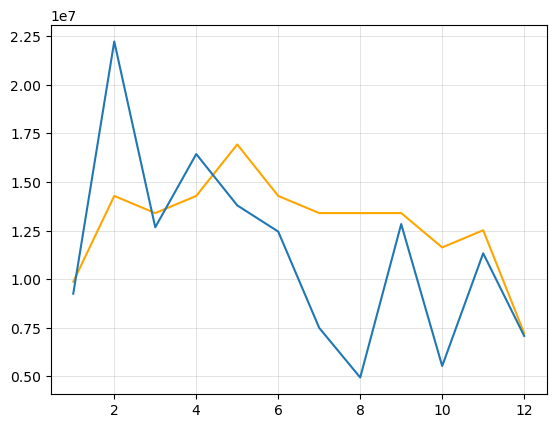

Row  2


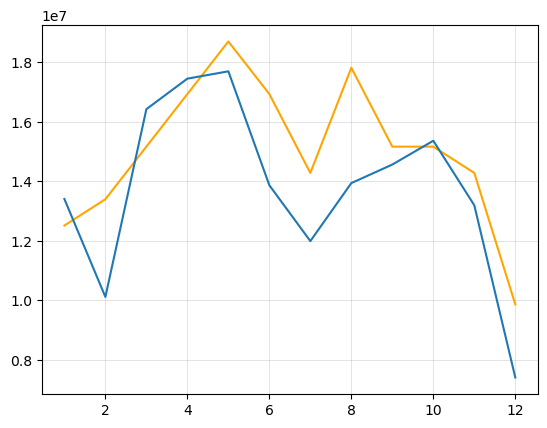

Row  3


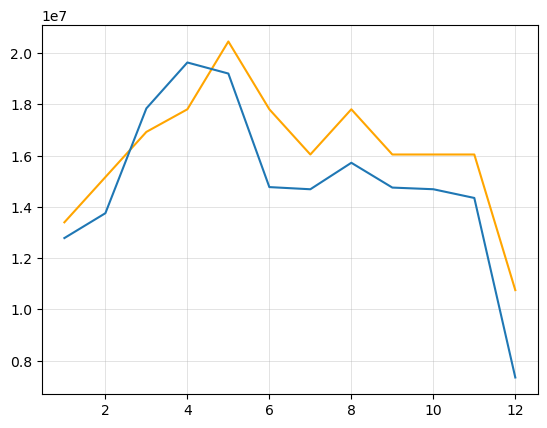

Row  4


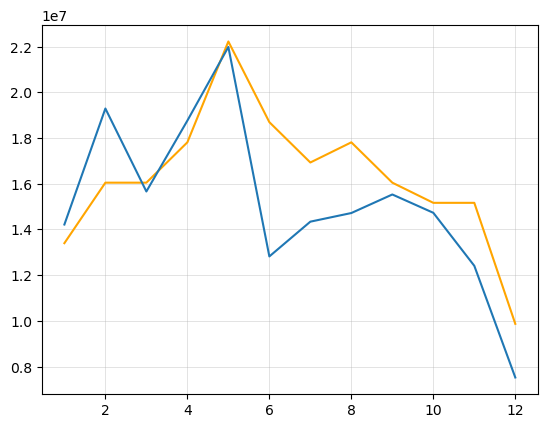

Row  5


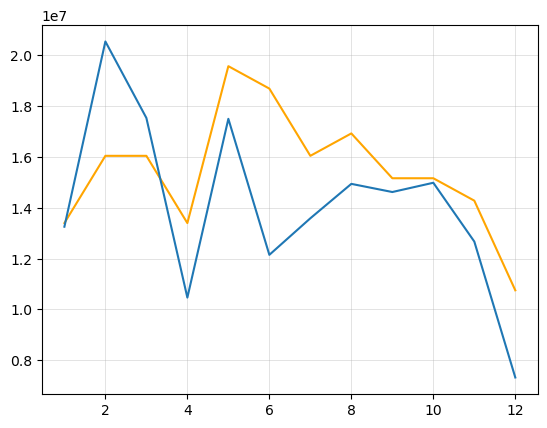

Row  6


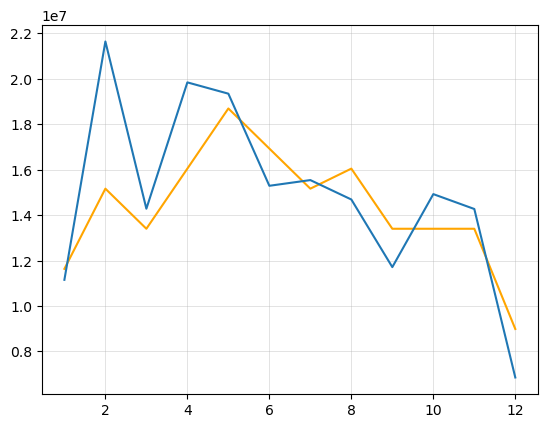

Row  7


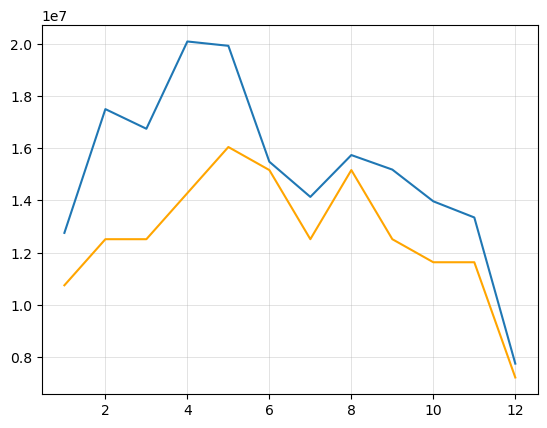

Row  8


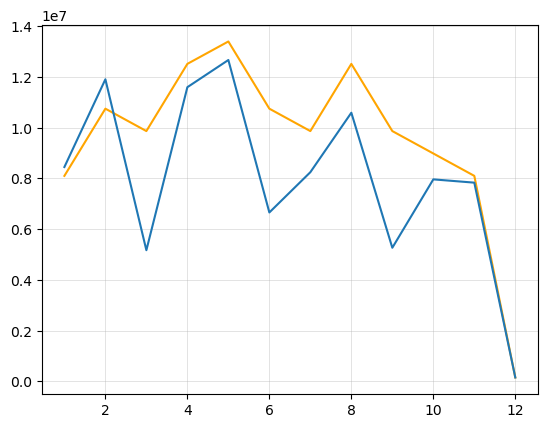

In [16]:
# Linear scaling to fit max/min range of the readings
x = q9_output_array
a, b = readings.min(), readings.max()
x_norm = (x - x.min()) * (b - a) / (x.max() - x.min()) + a
x_norm = np.round(x_norm, 2)
readings = np.round(readings,2)

# Plot results row by row
for i in range(8):   
    print("Row ", i+1)
    plt.plot(np.arange(1,13), x_norm[i,:], "orange")
    plt.plot(np.arange(1,13), readings[i,:])
    plt.grid(linewidth=0.5, alpha=0.5)
    plt.show()

In [17]:
np.mean(readings-x_norm)/np.mean(readings)

-0.044660229022715624